In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/AnalyzeStocks/master/dataset/US%20Stocks%20Fundamental%20Data%20in%20different%20months/2020-12-03%20fundamental%20data.csv", index_col='Unnamed: 0')

In [3]:
df.head()

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own
AACG,1.03,-,-,-,0.01,-0.61,-,-38.80%,-45.00%,154.90%,18.70%
AACQ,-,-,-,-,-,-,-,-,-,-,-
AACQU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACQW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,-,-,-,-,-,-13.85,-,219.80%,10.30%,-590.60%,0.10%


In [4]:
df['Dividend %'] = df['Dividend %'].str.replace('%', '')
df['ROE'] = df['ROE'].str.replace('%', '')
df['ROI'] = df['ROI'].str.replace('%', '')
df['EPS Q/Q'] = df['EPS Q/Q'].str.replace('%', '')
df['Insider Own'] = df['Insider Own'].str.replace('%', '')
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(how='all', inplace=True) 
df.drop_duplicates(inplace=True)

In [5]:
df.head()

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own
AACG,1.03,NaN,NaN,NaN,0.01,-0.61,NaN,-38.8,-45.0,154.9,18.7
AAL,NaN,NaN,NaN,NaN,NaN,-13.85,NaN,219.8,10.3,-590.6,0.1
AAME,0.34,64.85,NaN,NaN,0.26,0.03,NaN,1.0,1.1,210.5,2.8
AAOI,0.71,NaN,NaN,NaN,0.57,-3.91,NaN,-30.5,-15.6,3.6,6.5
AAON,9.66,44.26,49.02,3.69,0.02,1.44,0.6,24.1,18.1,42.0,19.1


In [6]:
df.head()

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own
AACG,1.03,NaN,NaN,NaN,0.01,-0.61,NaN,-38.8,-45.0,154.9,18.7
AAL,NaN,NaN,NaN,NaN,NaN,-13.85,NaN,219.8,10.3,-590.6,0.1
AAME,0.34,64.85,NaN,NaN,0.26,0.03,NaN,1.0,1.1,210.5,2.8
AAOI,0.71,NaN,NaN,NaN,0.57,-3.91,NaN,-30.5,-15.6,3.6,6.5
AAON,9.66,44.26,49.02,3.69,0.02,1.44,0.6,24.1,18.1,42.0,19.1


In [7]:
df_filtered = df[(df['P/E'].astype(float) < 15) &
                 (df['P/B'].astype(float) < 1)]

In [8]:
df_filtered = df_filtered[df_filtered['EPS Q/Q'].astype(float) > 10]
df_filtered = df_filtered[df_filtered['Debt/Eq'].astype(float) < 1]
df_filtered = df_filtered[df_filtered['ROI'].astype(float) > 0]
df_filtered

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own
ABCB,0.97,10.86,10.13,1.36,0.19,3.30,1.68,9.2,15.2,445.1,1.00
AMRB,0.72,10.30,10.34,0.69,0.00,1.10,2.48,7.3,24.9,12.8,8.60
ANAT,0.38,6.98,NaN,NaN,0.11,12.36,3.81,5.6,4.4,85.6,0.20
ATLO,0.95,11.00,NaN,NaN,0.00,1.96,4.64,9.2,21.4,42.0,0.10
BCBP,0.75,10.45,13.02,1.05,0.15,1.02,5.26,7.2,25.8,58.0,6.10
...,...,...,...,...,...,...,...,...,...,...,...
TRMK,0.94,11.38,13.42,1.63,0.04,2.24,3.61,8.5,22.7,34.6,10.31
UBOH,0.74,5.03,NaN,NaN,0.19,4.93,2.58,15.9,24.8,117.0,0.30
UBSI,0.92,13.45,14.19,1.68,0.07,2.26,4.61,6.9,13.7,23.6,0.70
VBFC,0.93,6.67,NaN,NaN,0.29,4.67,NaN,14.9,29.4,30.4,59.10


In [9]:
tickers = list(df_filtered.index.values)
!pip install yfinance
import yfinance as yf

In [10]:
data = pd.DataFrame(columns=tickers)
for ticker in tickers:
    data[ticker] = yf.download(ticker,'2020-01-01','2020-12-04')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

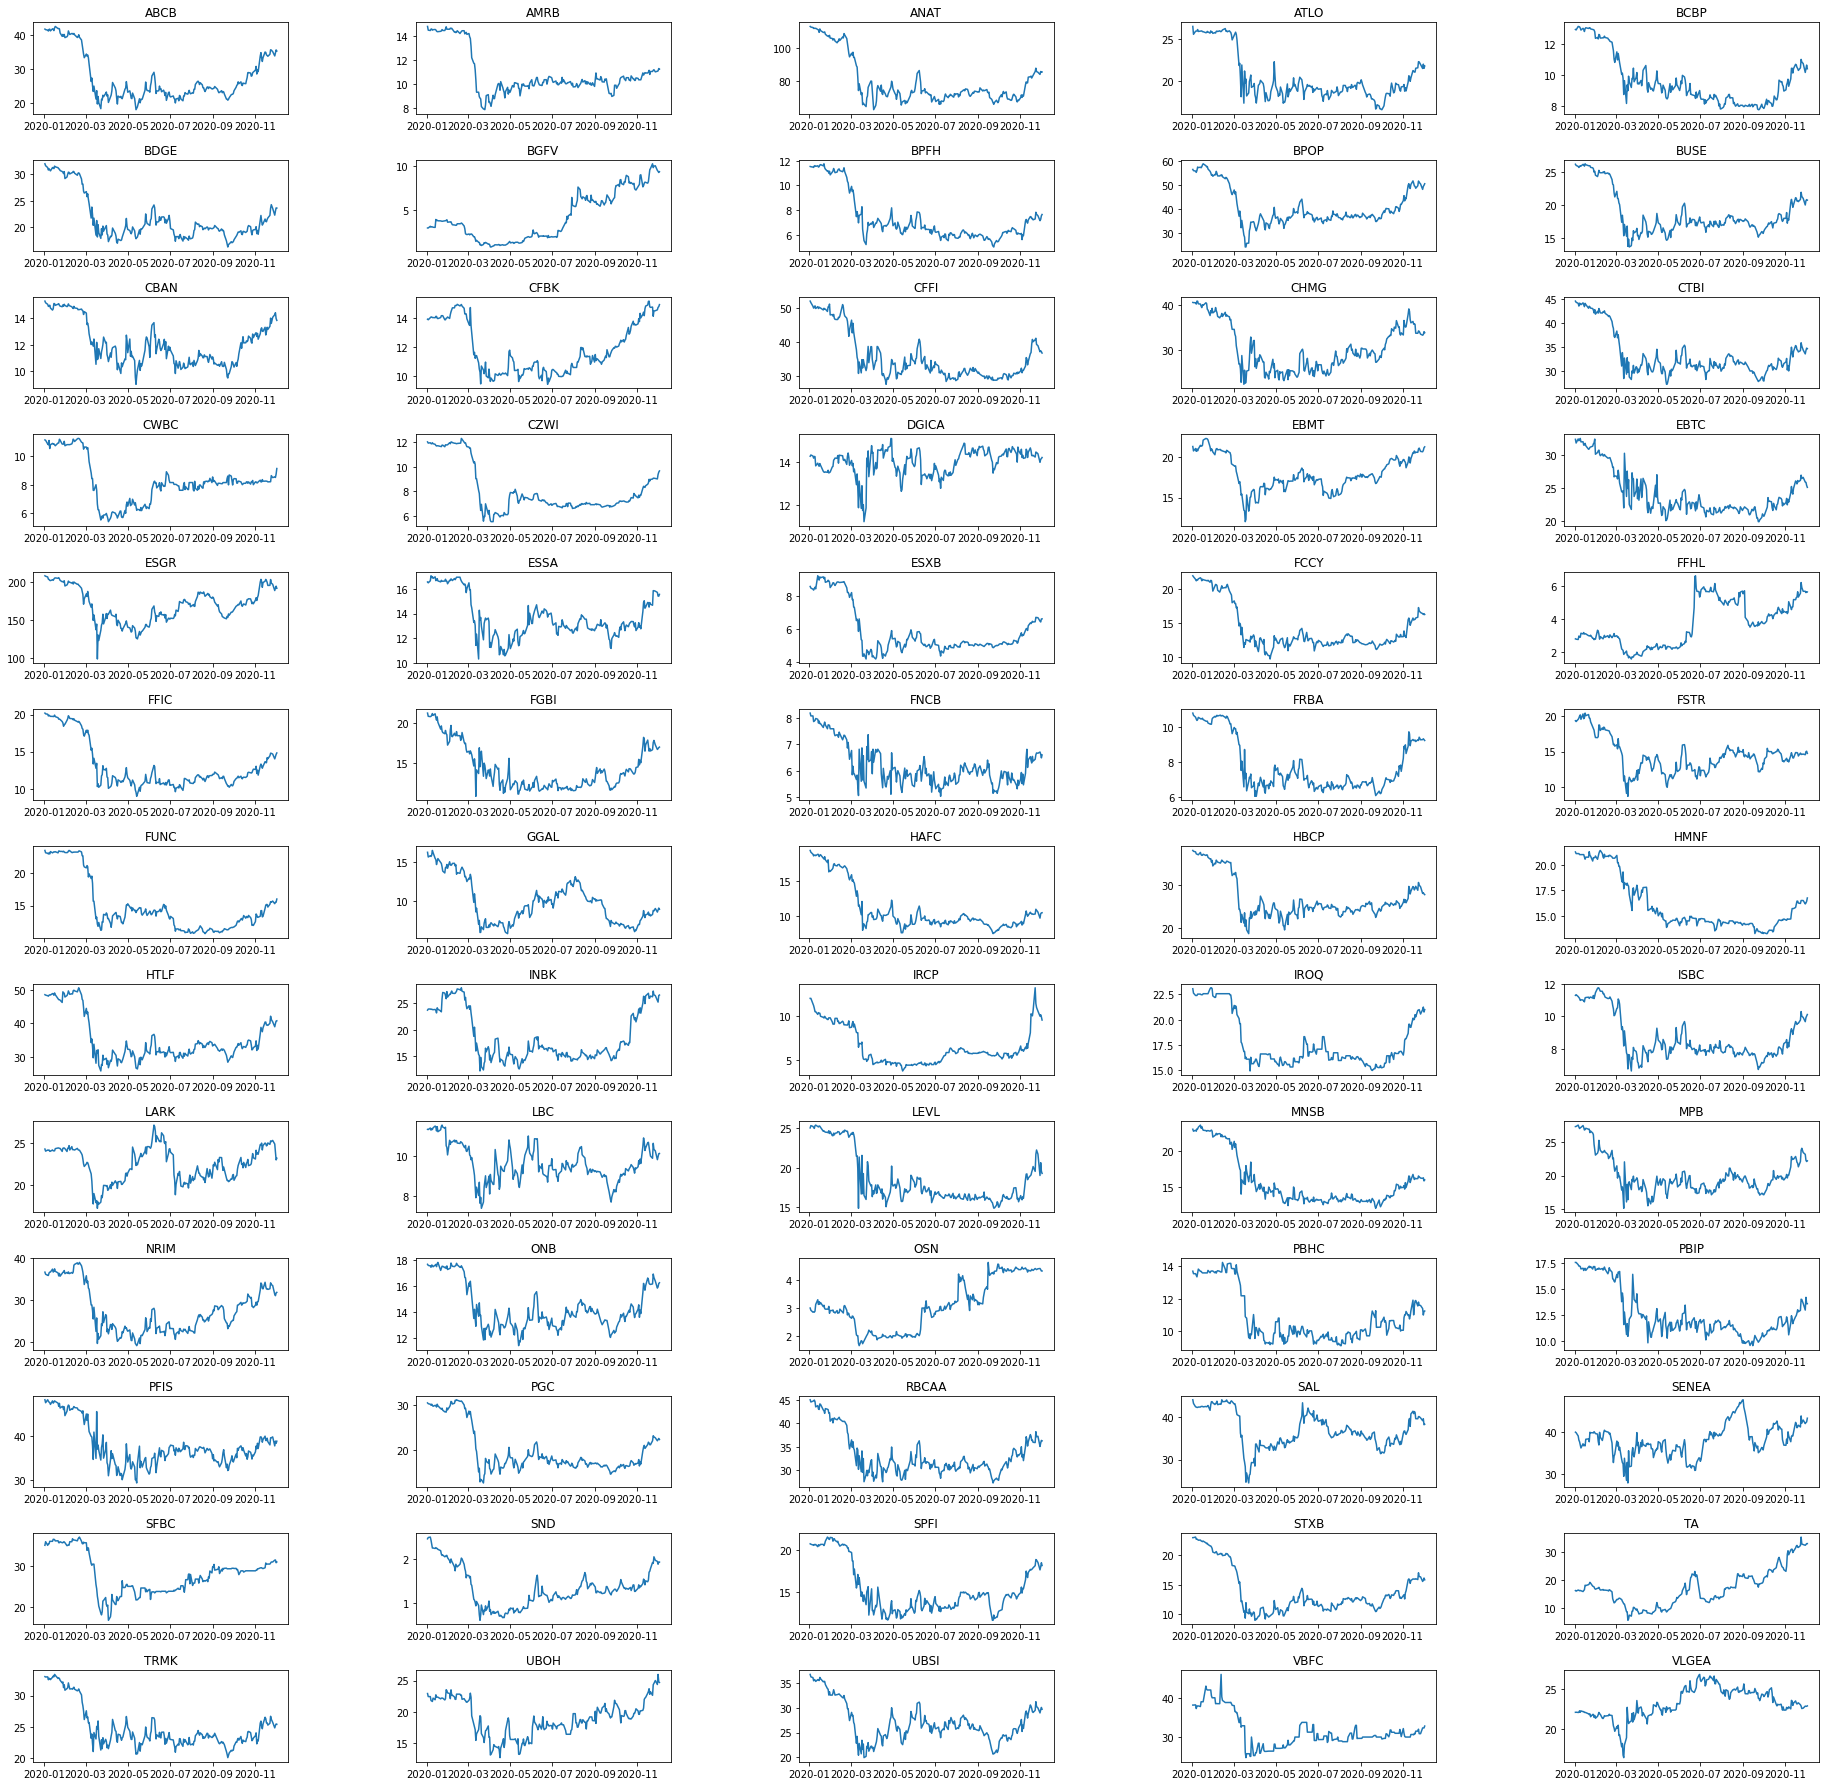

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(13, 5, figsize=(32, 32))

for col, ax in zip(data.columns, axes.flatten()):
    ax.plot(data.index, data[col])
    ax.set_title(col)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)